In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
corona_situation = pd.read_csv("owid-covid-data.csv")
corona_situation_Russia = corona_situation[corona_situation['location'] == 'Russia']

In [120]:
train_RU = corona_situation_Russia[corona_situation_Russia['date'] >= '2020-03-03'].iloc[:50,:].reset_index(drop=True)
test_RU = corona_situation_Russia[corona_situation_Russia['date'] >= '2020-03-03'].iloc[49:,:].reset_index(drop=True)

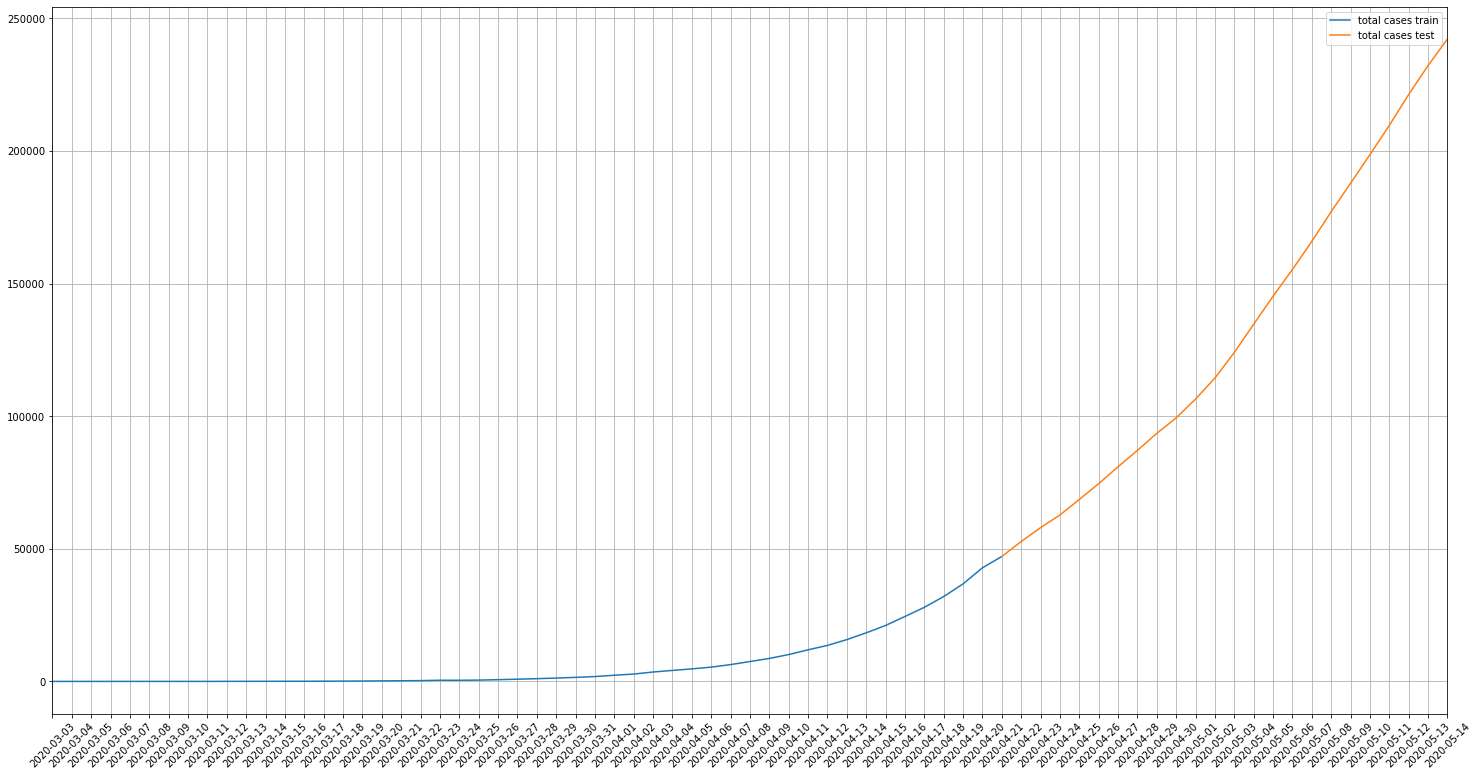

In [121]:
plt.figure(figsize=(25,13))
plt.plot(train_RU.date, train_RU.total_cases, label='total cases train')
plt.plot(test_RU.date, test_RU.total_cases, label='total cases test')
plt.xticks(rotation=45)
plt.xlim(min(train_RU.date), max(test_RU.date))
plt.grid()
plt.legend()
plt.show()

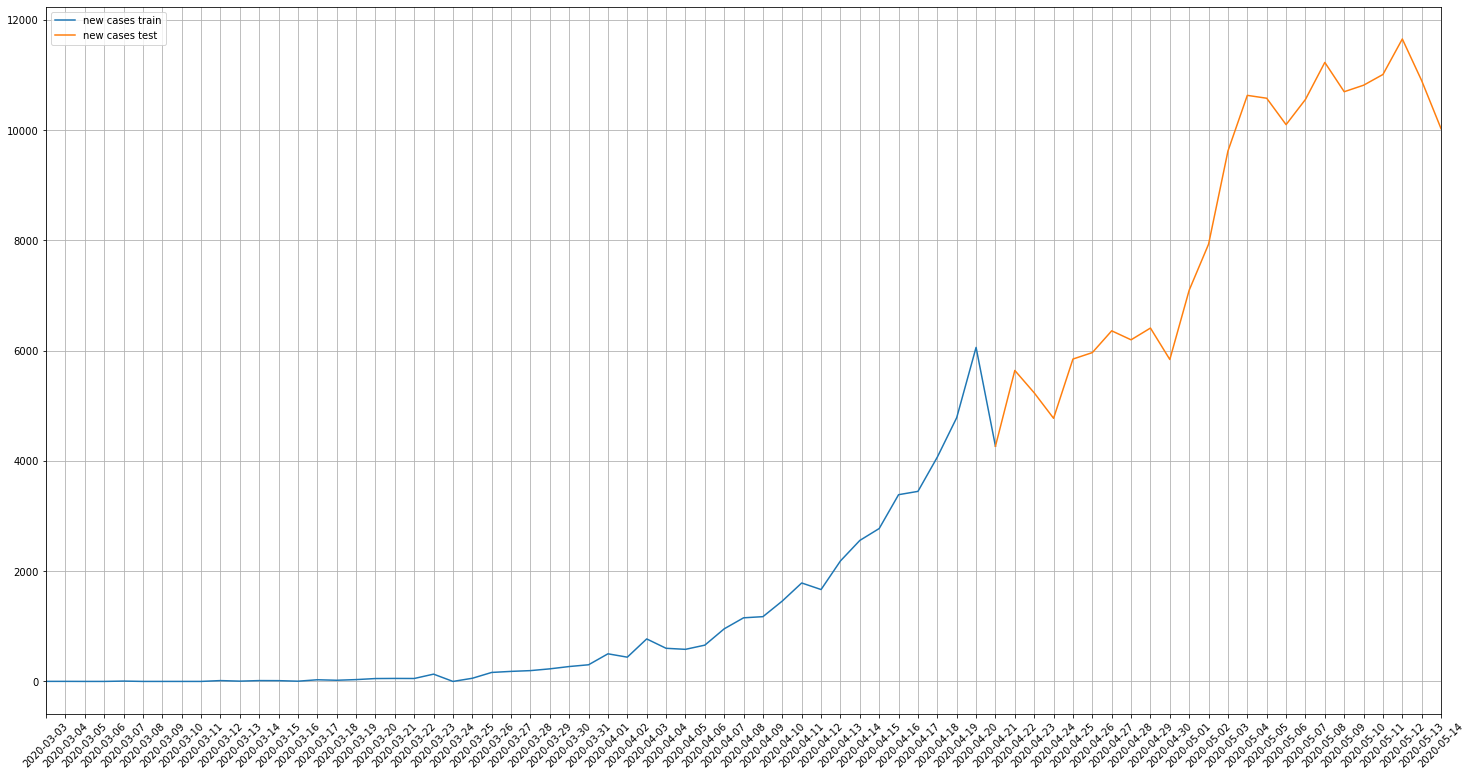

In [122]:
plt.figure(figsize=(25,13))
plt.plot(train_RU.date, train_RU.new_cases, label='new cases train')
plt.plot(test_RU.date, test_RU.new_cases, label='new cases test')
plt.xticks(rotation=45)
plt.xlim(min(train_RU.date), max(test_RU.date))
plt.grid()
plt.legend()
plt.show()

In [163]:
def fit_regression(X, y):
    W = np.linalg.inv(X.T @ X) @ X.T @ y
    return W
def get_prediction(X, W):
    y = X @ W
    return y

In [166]:
total_train_X = np.array(train_RU.index).reshape(-1,1)
total_logged_y = np.log(train_RU.total_cases.values.reshape(-1,1))

In [192]:
W = fit_regression(total_train_X, total_logged_y)

1552844468.0628188

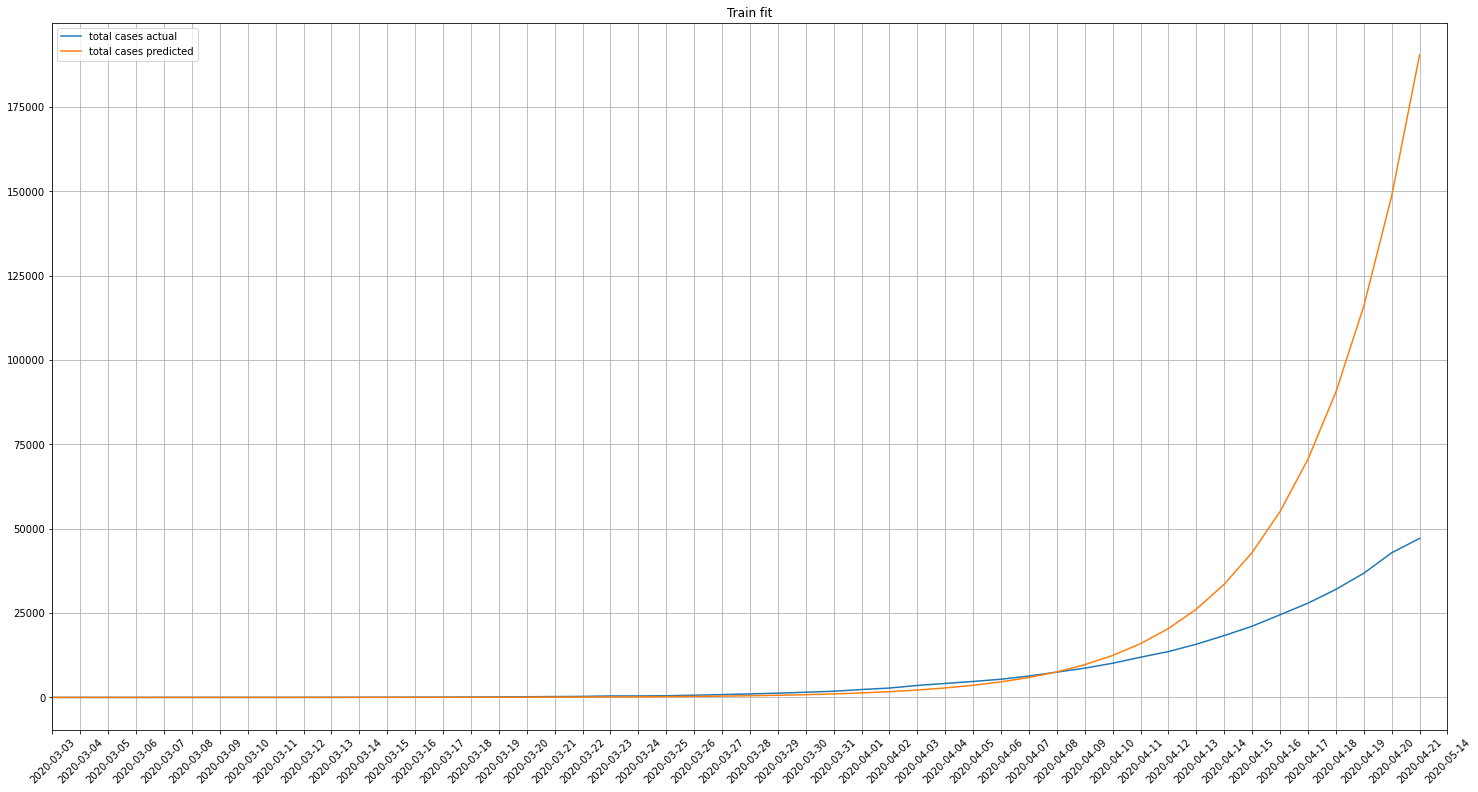

In [202]:
plt.figure(figsize=(25,13))
plt.plot(train_RU.date, total_logged_y, label='total cases actual')
plt.plot(train_RU.date, np.exp(get_prediction(total_train_X, W).reshape(-1)), label='total cases predicted')
plt.xticks(rotation=45)
plt.xlim(min(train_RU.date), max(test_RU.date))
plt.grid()
plt.title('Train fit')
plt.legend()
plt.show()

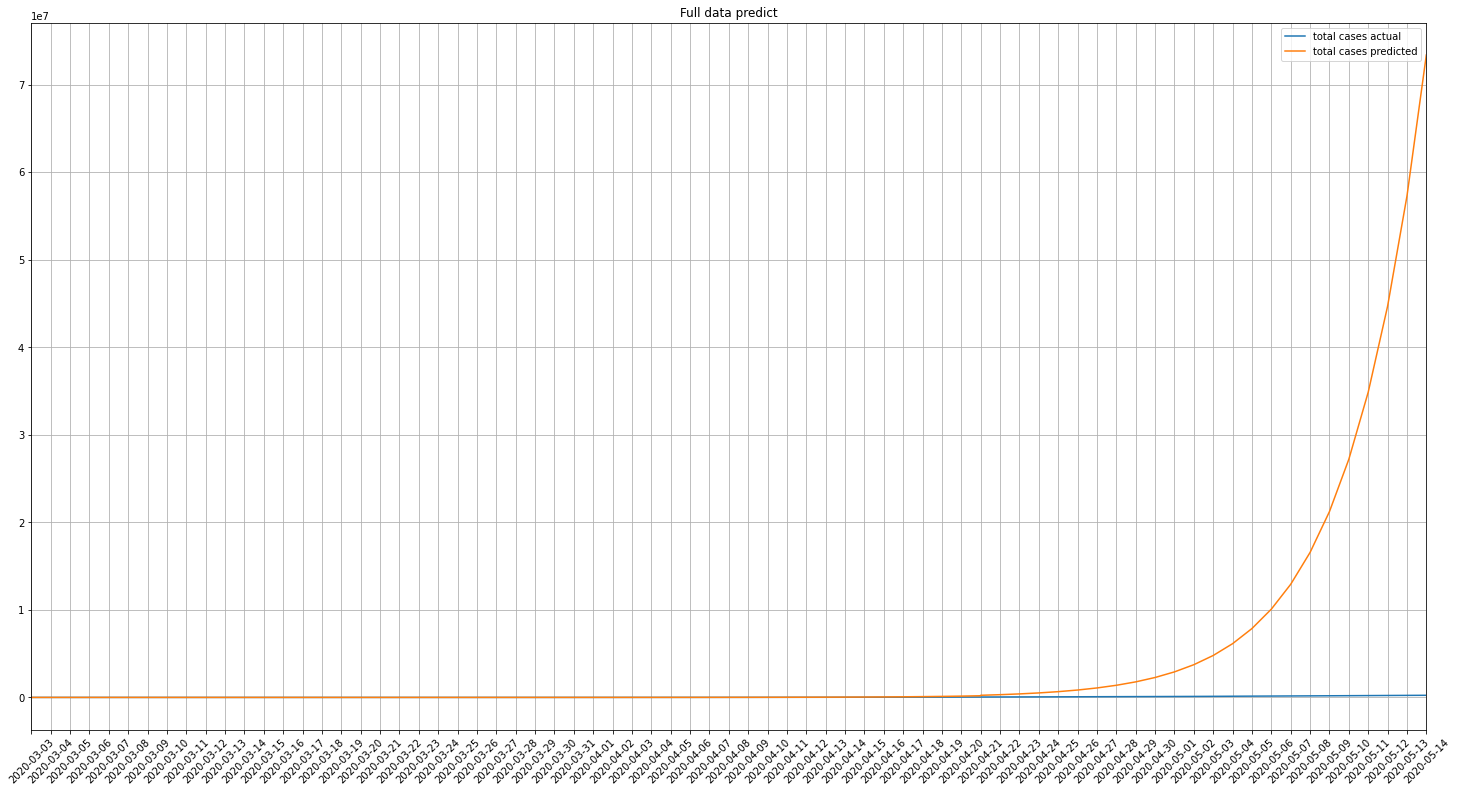

In [203]:
plt.figure(figsize=(25,13))
full_days = np.array([i for i in range(np.hstack((train_RU.date, test_RU.date)).shape[0])]).reshape(-1, 1)
preds = np.exp(get_prediction(full_days, W).reshape(-1))
plt.plot(np.hstack((train_RU.date, test_RU.date)), np.hstack((train_RU.total_cases, test_RU.total_cases)), label='total cases actual')
plt.plot(np.hstack((train_RU.date, test_RU.date)), preds, label='total cases predicted')
plt.xticks(rotation=45)
plt.xlim(min(train_RU.date), max(test_RU.date))
plt.grid()
plt.title('Full data predict')
plt.legend()
plt.show()

In [214]:
scipy.stats.multivariate_normal.pdf(W, W, (total_logged_y - np.exp(get_prediction(total_train_X, W).reshape(-1))).var())

1.0123858960519455e-05